# Read all GeoJson files

The geojson files were converted from GML files using a script within QGis (screenshot in FiC shared files)

In [2]:
import geopandas as gpd
import os

all_file = []
for file in os.listdir("Output/"):
        if file.endswith(".geojson"):
            file = "Output/"+ file 
            db = gpd.read_file(file)
            all_file.append(db)

# Merge all the grids into a single GeoPandas 

In [38]:
import pandas as pd
rdf = gpd.GeoDataFrame(pd.concat(all_file, ignore_index=True))

<AxesSubplot: >

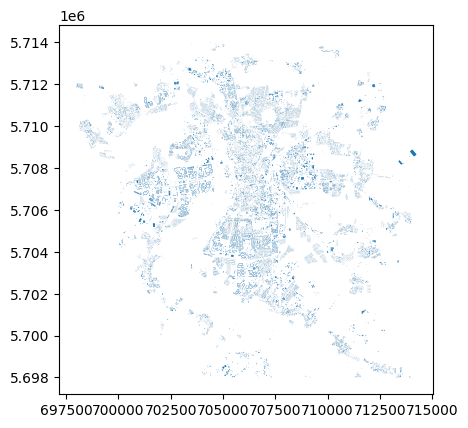

In [32]:
rdf.plot()

# Set crs to the common used one (3035)

In [55]:
rdf.crs = "EPSG:3035"

In [56]:
rdf.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

# Save into a GeoJson file

In [58]:
rdf.to_file('Halle_Truth_3035.geojson', driver='GeoJSON')  

In [59]:
rdf.head()

,gml_id,creationDate,informationSystem,name,Gemeindeschluessel,function,measuredHeight,measuredHeight_uom,CountryName,LocalityName,ThoroughfareNumber,ThoroughfareName,name_,geometry,measuredHeight_,measuredHeight_uom_
0,DEST_DESTLIKA0000Pxal,2017-12-14,http://repository.gdi-de.org/schemas/adv/cityg...,DESTLIKA0000Pxal,15088319,31001_1000,2.267,urn:adv:uom:m,Deutschland,Salzatal,None,None,None,MULTIPOLYGON Z (((698212.847 5709902.735 105.1...,NaN,NaN
1,DEST_DESTLIKA0000PJDr,2017-12-14,http://repository.gdi-de.org/schemas/adv/cityg...,DESTLIKA0000PJDr,15088319,31001_1000,2.461,urn:adv:uom:m,Deutschland,Salzatal,None,None,None,MULTIPOLYGON Z (((699449.776 5709137.726 102.0...,NaN,NaN
2,DEST_DESTLIKA0001xWXA,2017-12-14,http://repository.gdi-de.org/schemas/adv/cityg...,DESTLIKA0001xWXA,15002000,31001_1000,2.270,urn:adv:uom:m,Deutschland,"Halle (Saale), Stadt",None,None,None,MULTIPOLYGON Z (((699082.511 5709607.570 103.0...,NaN,NaN
3,DEST_DESTLIKA0001xX1V,2017-12-14,http://repository.gdi-de.org/schemas/adv/cityg...,DESTLIKA0001xX1V,15002000,31001_2000,7.439,urn:adv:uom:m,Deutschland,"Halle (Saale), Stadt",13,Max-Planck-Straße,None,MULTIPOLYGON Z (((699916.921 5709487.062 112.2...,NaN,NaN
4,DEST_DESTLIKA0000PJH2,2017-12-14,http://repository.gdi-de.org/schemas/adv/cityg...,DESTLIKA0000PJH2,15088319,31001_1000,3.738,urn:adv:uom:m,Deutschland,Salzatal,None,None,None,MULTIPOLYGON Z (((698890.856 5709605.857 101.2...,NaN,NaN


<AxesSubplot: >

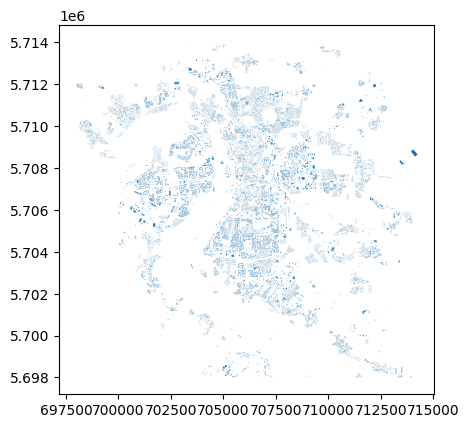

In [60]:
rdf.plot()

# Convert to GeoTiff

In [61]:
from geocube.api.core import make_geocube
resolution = 10
out_grid = make_geocube(vector_data=rdf, measurements=['measuredHeight'] , resolution=(resolution, -resolution))
out_grid['measuredHeight'].rio.to_raster('Hall_Truth.tiff')


C:\Users\bbel\AppData\Local\Programs\Python\Python39\lib\site-packages\rasterio\features.py:324: ShapeSkipWarning: Invalid or empty shape {'type': 'GeometryCollection', 'geometries': []} at index 75413 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
C:\Users\bbel\AppData\Local\Programs\Python\Python39\lib\site-packages\rasterio\features.py:324: ShapeSkipWarning: Invalid or empty shape {'type': 'GeometryCollection', 'geometries': []} at index 75415 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
C:\Users\bbel\AppData\Local\Programs\Python\Python39\lib\site-packages\rasterio\features.py:324: ShapeSkipWarning: Invalid or empty shape {'type': 'GeometryCollection', 'geometries': []} at index 75422 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.form